# Data Exploration 

Exploratory Data Analysis (EDA) is an important step within a data science workflow. It allows you to become familiar with your data and understand it's contents, extent and variation. Within this stage, you can identify patterns within the data and also relationships between the features (well logs).

As petrophysicists/geoscientists we commonly use log plots, histograms and crossplots (scatter plots) to analyse and explore well log data. Python provides a great toolset for visualising the data from different perspectives in a quick and easy way.

In this workbook, we will cover:
- Reading in data from a CSV file
- Viewing data on a log plot
- Viewing data on a crossplot / scatter plot
- Viewing data on a histogram
- Visualising all well log curves on a crossplot and histogram using a pairplot

## Importing Libraries & Data

The first step is to import the libraries that we require. These will be:
- pandas for loading and storing the data
- matplotlib and seaborn for visualising the data
- numpy for a number of calculation methods

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns

Next, we will load the data in using the pandas `read_csv` function and assign it to the variable `df`. The data will now be stored within a structured object known as a dataframe.

In [2]:
df = pd.read_csv('data/spwla_volve_data.csv')

The first step after loading in a dataset it to check its contents. The first method `.describe()` provides summary statistics of each numeric column within the dataframe. We can gain information such as the number of points, the mean, the standard deviation, min and max values, and the percentile values.

In [3]:
df.describe()

,MD,BS,CALI,DT,DTS,GR,NPHI,RACEHM,RACELM,RHOB,RPCEHM,RPCELM,PHIF,SW,VSH
count,27845.000000,27845.0,27845.000000,5493.000000,5420.000000,27845.000000,27845.000000,27845.000000,27845.000000,27845.000000,27845.000000,27600.000000,27736.000000,27736.000000,2.784400e+04
mean,3816.224960,8.5,8.625875,78.000104,131.027912,38.529140,0.188131,352.689922,97.558930,2.379268,1561.079977,30.041154,0.157434,0.531684,2.724204e-01
std,398.843662,0.0,0.079941,7.730495,13.230939,21.814711,0.053390,1367.355219,395.725094,0.162293,9570.308431,210.915588,0.075957,0.353637,1.872371e-01
min,3223.000000,8.5,8.304900,54.280000,83.574000,6.869100,0.024000,0.197400,0.234900,1.627000,0.139000,0.136600,0.001000,0.043000,1.820000e-15
25%,3503.000000,8.5,8.556900,72.562500,123.403425,21.128200,0.157000,1.856400,1.781000,2.240000,2.148300,1.884000,0.091000,0.201000,1.258000e-01
50%,3713.300000,8.5,8.625000,77.228000,131.864350,35.071000,0.183900,4.035800,3.681200,2.356000,5.136800,4.195400,0.178000,0.433000,2.400000e-01
75%,4057.000000,8.5,8.672000,84.342900,138.017500,49.178300,0.215200,14.929000,8.891000,2.502500,24.687400,14.782650,0.225000,1.000000,3.540000e-01
max,4744.000000,8.5,9.175000,96.277600,186.090800,127.055700,0.541000,6381.099100,2189.603000,3.090000,62290.770000,5571.435100,0.292000,1.000000,1.000000e+00


The next method we can call upon is `info()`. This provides a list of all of the columns within the dataframe, their data type (e.g, float, integer, string, etc.), and the number of non-null values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27845 entries, 0 to 27844
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wellName  27845 non-null  object 
 1   MD        27845 non-null  float64
 2   BS        27845 non-null  float64
 3   CALI      27845 non-null  float64
 4   DT        5493 non-null   float64
 5   DTS       5420 non-null   float64
 6   GR        27845 non-null  float64
 7   NPHI      27845 non-null  float64
 8   RACEHM    27845 non-null  float64
 9   RACELM    27845 non-null  float64
 10  RHOB      27845 non-null  float64
 11  RPCEHM    27845 non-null  float64
 12  RPCELM    27600 non-null  float64
 13  PHIF      27736 non-null  float64
 14  SW        27736 non-null  float64
 15  VSH       27844 non-null  float64
dtypes: float64(15), object(1)
memory usage: 3.4+ MB


## Data Visualisation

The next useful set of methods available to us is the `head()` and `.tail()` functions. These return the first / last five rows of the dataframe

In [5]:
df.head()

,wellName,MD,BS,CALI,DT,DTS,GR,NPHI,RACEHM,RACELM,RHOB,RPCEHM,RPCELM,PHIF,SW,VSH
0,15/9-F-1 A,3431.0,8.5,8.6718,86.9092,181.2241,53.9384,0.3222,0.5084,0.8457,2.7514,0.6461,0.6467,0.02,1.0,0.6807
1,15/9-F-1 A,3431.1,8.5,8.6250,86.4334,181.1311,57.2889,0.3239,0.4695,0.8145,2.7978,0.7543,0.6570,0.02,1.0,0.7316
2,15/9-F-1 A,3431.2,8.5,8.6250,85.9183,180.9487,59.0455,0.3277,0.5012,0.8048,2.8352,0.8718,0.6858,0.02,1.0,0.7583
3,15/9-F-1 A,3431.3,8.5,8.6250,85.3834,180.7211,58.2550,0.3357,0.6048,0.7984,2.8557,0.9451,0.7913,0.02,1.0,0.7462
4,15/9-F-1 A,3431.4,8.5,8.6250,84.8484,180.4930,59.4569,0.3456,0.7115,0.7782,2.8632,1.0384,0.8730,0.02,1.0,0.7646


In [6]:
df.tail()

,wellName,MD,BS,CALI,DT,DTS,GR,NPHI,RACEHM,RACELM,RHOB,RPCEHM,RPCELM,PHIF,SW,VSH
27840,15/9-F-11 B,4743.6,8.5,8.875,NaN,NaN,19.561,0.109,1.789,1.768,2.493,3.985,2.194,0.107,0.621,0.146
27841,15/9-F-11 B,4743.7,8.5,8.851,NaN,NaN,16.974,0.116,1.719,1.751,2.468,3.158,1.996,0.119,0.624,0.120
27842,15/9-F-11 B,4743.8,8.5,8.804,NaN,NaN,14.334,0.117,1.737,1.760,2.443,2.248,1.796,0.128,0.670,0.093
27843,15/9-F-11 B,4743.9,8.5,8.726,NaN,NaN,12.617,0.114,1.719,1.767,2.427,1.670,1.600,0.132,0.736,0.076
27844,15/9-F-11 B,4744.0,8.5,8.672,NaN,NaN,12.828,0.106,1.669,1.777,2.424,1.317,1.467,0.130,0.822,0.078


We know from the introduction that we should have 5 wells within this dataset. We can check that out by calling upon the wellName column and using the method `.unique()`. This will return back an array listing all of the unique values within that column.

In [7]:
df['wellName'].unique()

array(['15/9-F-1 A', '15/9-F-1 B', '15/9-F-1 C', '15/9-F-11 A',
       '15/9-F-11 B'], dtype=object)

As seen above, we can call upon specific columns within the dataframe by name. If we do this for a numeric column, such as CALI, we will return a pandas series containing the first 5 values, last 5 values, and details about that column.

In [8]:
df['CALI']

0        8.6718
1        8.6250
2        8.6250
3        8.6250
4        8.6250
          ...  
27840    8.8750
27841    8.8510
27842    8.8040
27843    8.7260
27844    8.6720
Name: CALI, Length: 27845, dtype: float64

### Well Log Plots

Log plots are one of the bread and butter tools that we use to analyse well log data. They consist of several columns called tracks. Each column can have one or more logging curves within them, plotted against depth. They help us visualise the subsurface and allow us to identify potential hydrocarbon intervals.

As we will want to be calling upon a log plot for each of the wells within the dataframe, we can create a function.

Functions allow us to break down our code into manageable chunks and saves repeating code multiple times.

This `create_plot` function takes a number of arguments (inputs):
- **wellname**: the wellname as a string
- **dataframe**: the dataframe for the selected well
- **curves_to_plot**: a list of logging curves / dataframe columns we are wanting to plot
- **depth_curve**: the the depth curve we are wanting to plot against
- **log_curves**: a list of curves that need to be displayed on a logarithmic scale

In [9]:
def create_plot(wellname, dataframe, curves_to_plot, depth_curve, log_curves=[]):
    # Count the number of tracks we need
    num_tracks = len(curves_to_plot)
    
    # Setup the figure and axes
    fig, ax = plt.subplots(nrows=1, ncols=num_tracks, figsize=(num_tracks*2, 10))
    
    # Create a super title for the entire plot
    fig.suptitle(wellname, fontsize=20, y=1.05)
    
    # Loop through each curve in curves_to_plot and create a track with that data
    for i, curve in enumerate(curves_to_plot):
        
        
        ax[i].plot(dataframe[curve], depth_curve)
        
        # Setup a few plot cosmetics
        ax[i].set_title(curve, fontsize=14, fontweight='bold')
        ax[i].grid(which='major', color='lightgrey', linestyle='-')
        
        # We want to pass in the deepest depth first, so we are displaying the data 
        # from shallow to deep
        ax[i].set_ylim(depth_curve.max(), depth_curve.min())

        # Only set the y-label for the first track. Hide it for the rest
        if i == 0:
            ax[i].set_ylabel('DEPTH (m)', fontsize=18, fontweight='bold')
        else:
            plt.setp(ax[i].get_yticklabels(), visible = False)
        
        # Check to see if we have any logarithmic scaled curves
        if curve in log_curves:
            ax[i].set_xscale('log')
            ax[i].grid(which='minor', color='lightgrey', linestyle='-')
    
    plt.tight_layout()
    plt.show()

As there are 5 wells within the dataframe, if we try to plot all of that data in one go, we will have mixed measurements from all of the wells. To resolve this, we can create a new dataframe that is grouped by the wellname.

In [10]:
grouped =df.groupby('wellName')

When we call upon the `head()` function of this new grouped dataframe, we will get the first 5 rows for each well.

In [11]:
grouped.head()

,wellName,MD,BS,CALI,DT,DTS,GR,NPHI,RACEHM,RACELM,RHOB,RPCEHM,RPCELM,PHIF,SW,VSH
0,15/9-F-1 A,3431.0,8.5,8.6718,86.9092,181.2241,53.9384,0.3222,0.5084,0.8457,2.7514,0.6461,0.6467,0.0200,1.0,0.6807
1,15/9-F-1 A,3431.1,8.5,8.6250,86.4334,181.1311,57.2889,0.3239,0.4695,0.8145,2.7978,0.7543,0.6570,0.0200,1.0,0.7316
2,15/9-F-1 A,3431.2,8.5,8.6250,85.9183,180.9487,59.0455,0.3277,0.5012,0.8048,2.8352,0.8718,0.6858,0.0200,1.0,0.7583
3,15/9-F-1 A,3431.3,8.5,8.6250,85.3834,180.7211,58.2550,0.3357,0.6048,0.7984,2.8557,0.9451,0.7913,0.0200,1.0,0.7462
4,15/9-F-1 A,3431.4,8.5,8.6250,84.8484,180.4930,59.4569,0.3456,0.7115,0.7782,2.8632,1.0384,0.8730,0.0200,1.0,0.7646
2101,15/9-F-1 B,3230.0,8.5,8.6637,86.3417,NaN,93.6767,0.2188,1.5839,1.5527,2.5621,1.5495,1.5705,0.0589,1.0,0.7095
2102,15/9-F-1 B,3230.1,8.5,8.6637,86.6821,NaN,92.0230,0.2187,1.5714,1.5531,2.5548,1.5336,1.5680,0.0634,1.0,0.6962
2103,15/9-F-1 B,3230.2,8.5,8.6637,87.3238,NaN,90.6957,0.2189,1.5592,1.5399,2.5506,1.5386,1.5650,0.0659,1.0,0.6856
2104,15/9-F-1 B,3230.3,8.5,8.6637,87.9835,NaN,90.5715,0.2207,1.5442,1.5302,2.5490,1.5420,1.5544,0.0669,1.0,0.6844
2105,15/9-F-1 B,3230.4,8.5,8.6637,88.5307,NaN,94.0758,0.2249,1.5300,1.5156,2.5461,1.5330,1.5451,0.0686,1.0,0.7126


To have more control over the well we are wanting to plot, we can split the grouped dataframe into single dataframes and store them within a list. This will allow us to access specific wells by passing in a list index value.

In [12]:
# Create empty lists
dfs_wells = []
wellnames = []

#Split up the data by well
for well, data in grouped:
    dfs_wells.append(data)
    wellnames.append(well)

If we loop through the wellnames list we can get the index number and the associated wellname.

In [13]:
for i, well in enumerate(wellnames):
    print(f'Index: {i} - {well}')

Index: 0 - 15/9-F-1 A
Index: 1 - 15/9-F-1 B
Index: 2 - 15/9-F-1 C
Index: 3 - 15/9-F-11 A
Index: 4 - 15/9-F-11 B


Before we plot the data, we need to specify the curves we are wanting to plot, and also specify which of those curves are logarithmicaly scaled.

In [14]:
curves_to_plot = ['BS', 'CALI', 'DT', 'DTS', 'GR', 'NPHI', 'RACEHM', 'RACELM', 'RHOB', 'RPCEHM', 'RPCELM', 'PHIF', 'SW', 'VSH']
logarithmic_curves = ['RACEHM', 'RACELM', 'RPCEHM', 'RPCELM']

Let's call upon the first well and make a plot.

*Note that Python lists are indexed from 0*

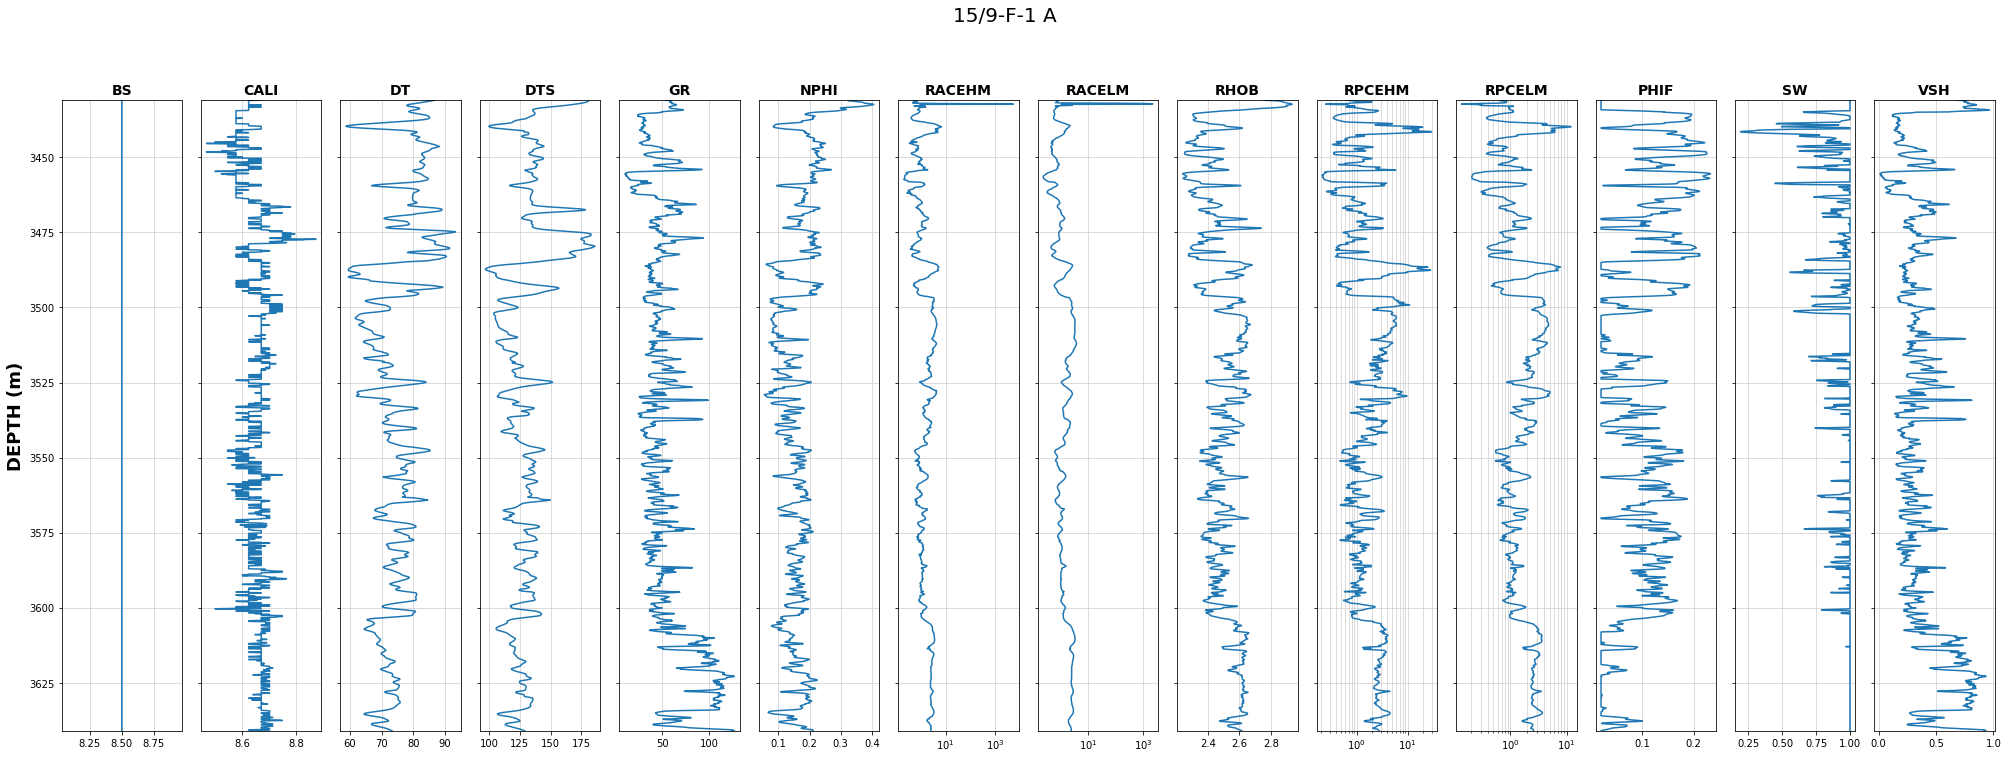

In [15]:
well = 0
create_plot(wellnames[well], dfs_wells[well], curves_to_plot, dfs_wells[well]['MD'], logarithmic_curves)

We can do the same with the second well:

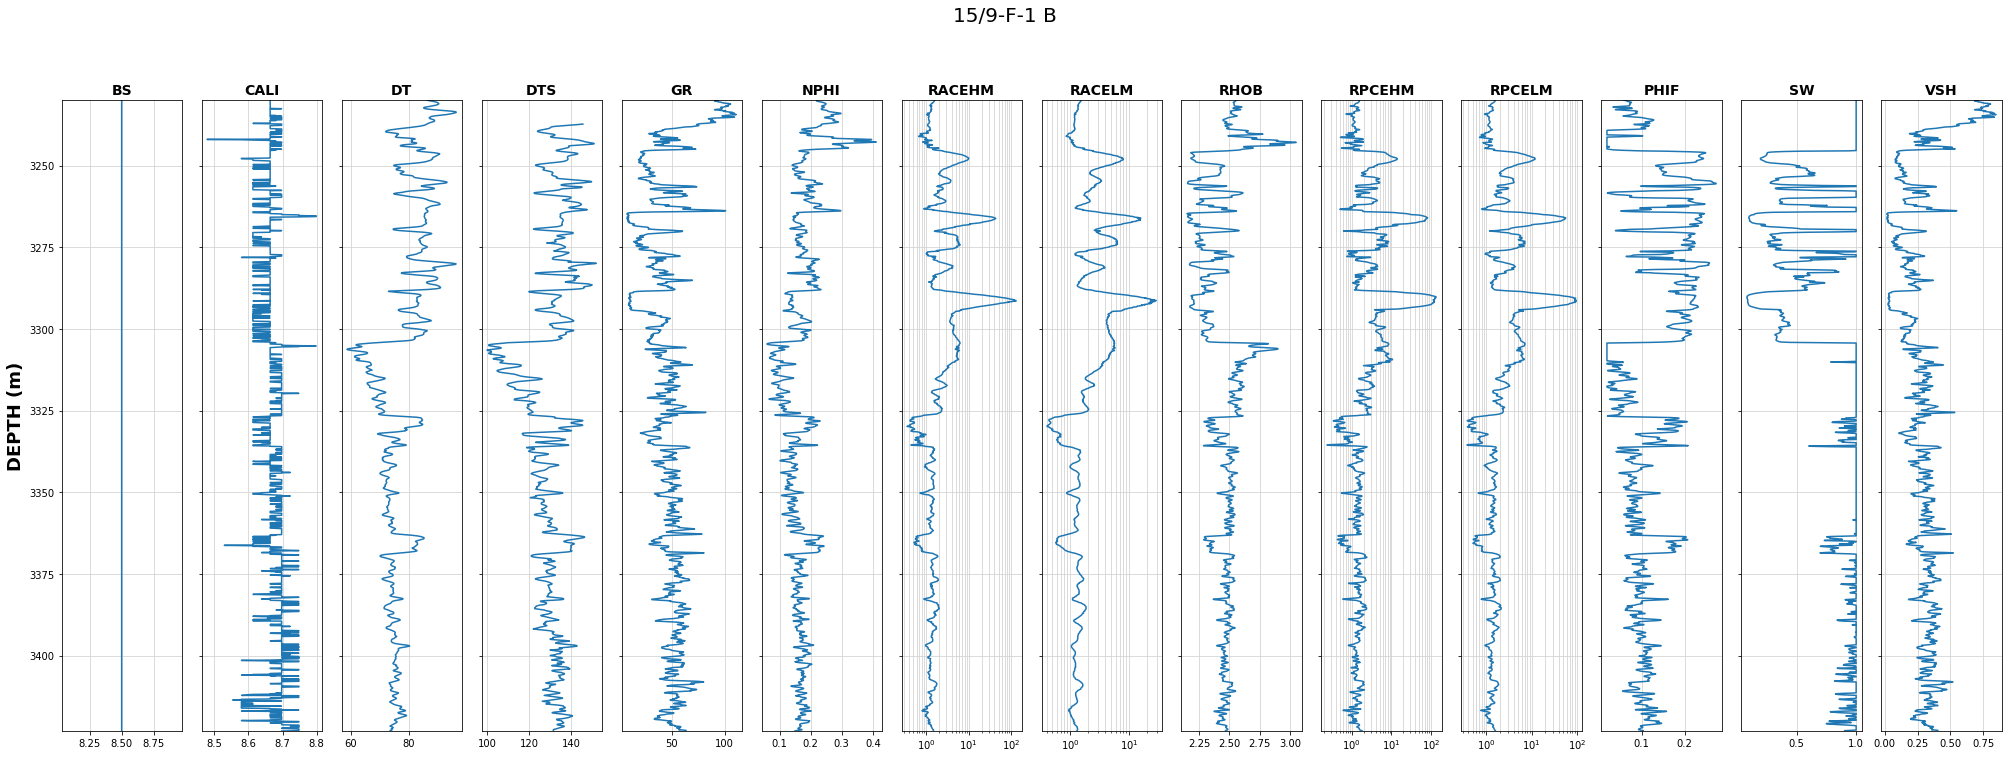

In [16]:
well = 1
create_plot(wellnames[well], dfs_wells[well], curves_to_plot, dfs_wells[well]['MD'], logarithmic_curves)

### Standard Crossplots

Crossplots (also known as scatter plots) are another common data visualisation tool we use during a petrophysical analysis. 

Similar to the log plots section above, we will create a simple function where we can generate multiple crossplots using a simple function. 

The arguments (inputs) to this function are:
- **welldata** - The grouped dataframe created using `.groupby('wellName')`
- **xvar** - X-axis variable as a string, e.g. 'NPHI'
- **yvar** - Y-axis variable as a string, e.g. 'RHOB'
- **color** - A third variable used for applying colour to the crossplot, e.g. 'GR'
- **rows** - Optional. The number of rows to display on the figure
- **cols** - Optional. The number of columns to display on the figure
- **xscale** - Optional. The X-axis scale. Defaults to 0 and 1
- **yscale** - Optional. The Y-axis scale. Defaults to 0 and 1
- **vmin** - Optional. The minimum value for the colour shading. Defaults to 1
- **vmax** - Optional, The maximum value for the colour shading. Defaults to 1

In [17]:
def make_xplot(welldata, xvar, yvar,  color, rows=1, cols=1, xscale=[0,1], yscale=[0,1], vmin=0, vmax=1):
    # Set up the figure
    fig, axs = plt.subplots(rows, cols, figsize=(25,5))
    
    # Create a colour map for the thrid variable
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["green","yellow","red"])
    
    # Loop through each well in the grouped dataframe
    for (name, welldata), ax in zip(grouped, axs.flat):
        
        # Call upon the scatter plot and pass in the required variables
        sc = ax.scatter(x=xvar, y=yvar, data=welldata, s=5, c=color, vmin=vmin, vmax=vmax, cmap=cmap)
        
        # Setup the aesthetics of the plot such as labels, and scales.
        ax.set_ylim(yscale[0], yscale[1])
        ax.set_xlim(xscale[0], xscale[1])
        ax.set_ylabel(yvar)
        ax.set_xlabel(xvar)
        ax.set_title(name)
        
        # Call upon the colour bar
        fig.colorbar(sc, ax=ax)
    plt.tight_layout()
    plt.show()

We can now use our function to create density-neutron crossplots coloured by caliper.

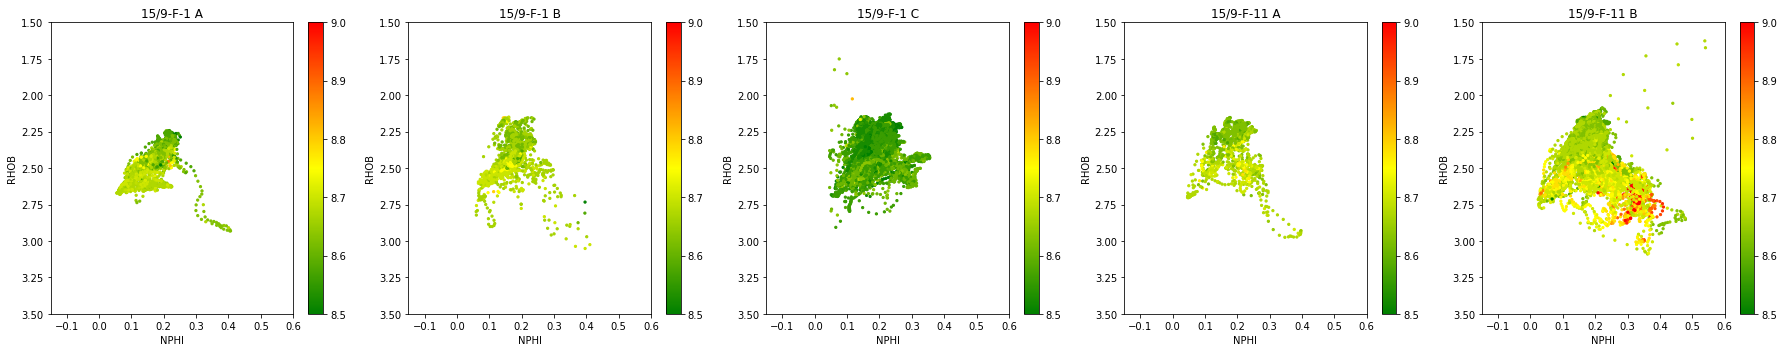

In [18]:
make_xplot(grouped, 'NPHI', 'RHOB', 'CALI', 1, 5, [-0.15, 0.6], [3.5,1.5], 8.5, 9)

From the plot above, we can see that most of the wells are in good shape, although well 15/9-F11 B contains some borehole enlargement.

The next crossplot we will look at is acoustic compressional (DTC) versus acoustic shear (DTS).

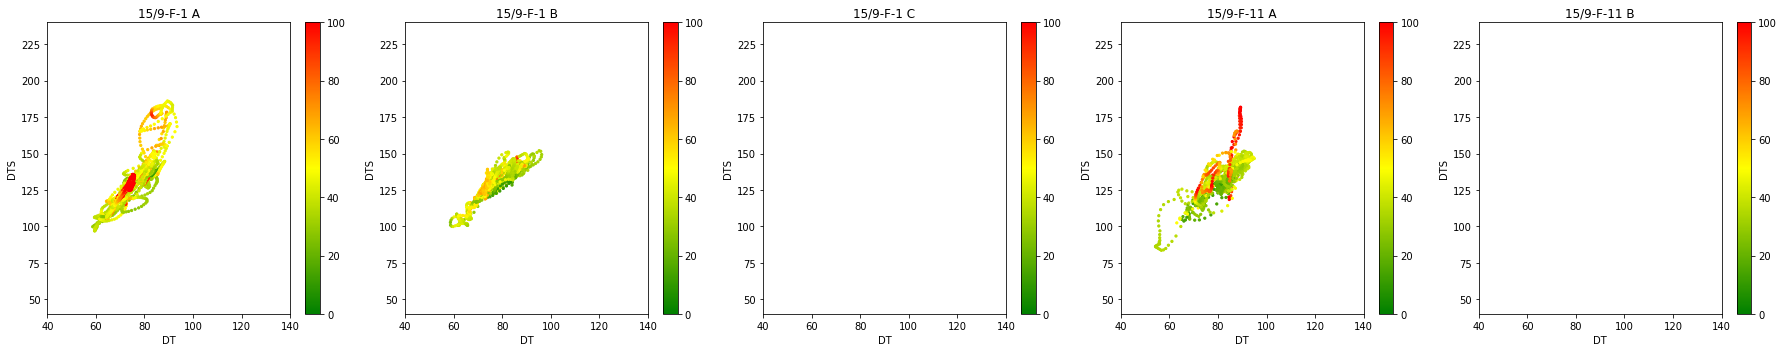

In [19]:
make_xplot(grouped, 'DT', 'DTS', 'GR', 1, 5, [40, 140], [40, 240], 0, 100)

When we view this data, we can see that two of the charts are blank. This lets us know right away we may have missing data. We will explore this in the next notebook - Missing Data.

### Histograms
#### matplotlib histograms

Histograms allow us to view the distribution, shape and range of numerical data. The data is split up into a number of bins, which are represented by individual bars on the plot.

We can call upon a simple histogram from our main dataframe, simply by appending `.hist(column-name)` onto the end of the dataframe object.

array([[<AxesSubplot:title={'center':'GR'}>]], dtype=object)

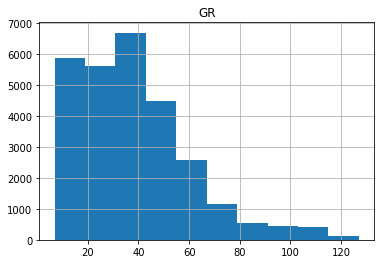

In [20]:
df.hist('GR')

Right away we can see we have a few issues. The first is that all wells are grouped together, the number of bins are too few, and the plot does not look great. Se we can change it up a bit, by first increasing the number of bins and removing the grid lines.

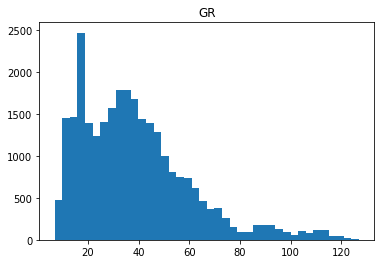

In [21]:
df.hist('GR', bins=40)
plt.grid(False)

The above generates an instant improvement to the plot. We can see the distribution of the data much more clearly now.

#### Seaborn Histograms

We can also call upon the Seaborn plotting library, which gives us much more control over the aesthetics of the plot. In the first example, we can add on a the Kernel Density Estimate (KDE).

<AxesSubplot:xlabel='GR', ylabel='Count'>

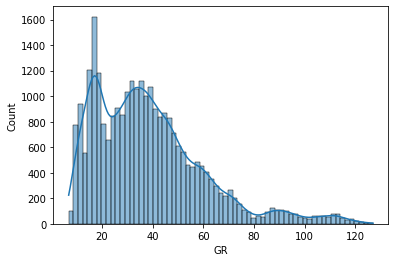

In [22]:
sns.histplot(df, x='GR', kde=True)

From the plot above, we can see that the labels are automatically generated for us, and we have the KDE line plotted as well. 

We can also supply another argument: `hue` which will allow us to use a third variable to split out the data. If we pass in the wellname for the hue, we can generate separate histograms for each well.

<AxesSubplot:xlabel='GR', ylabel='Count'>

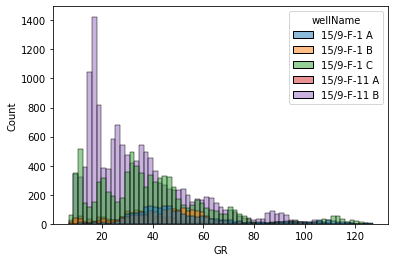

In [23]:
sns.histplot(df, x='GR', hue='wellName')

We can now do the same with Bulk Density (RHOB). We can also add in the number of bins that we are wanting to display.

<AxesSubplot:xlabel='RHOB', ylabel='Count'>

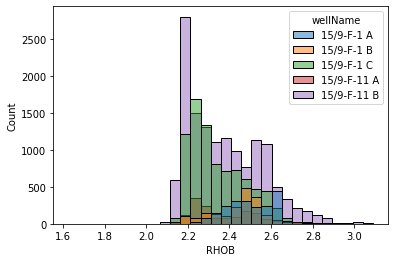

In [24]:
sns.histplot(df, x='RHOB', hue='wellName', bins=30)

#### FacetGrid

If we want to split the data up into individual plots per well, we need to use a FacetGrid and map the required histogram plot to it.

This is achieved using the thw following two lines.

For the FacetGrid we specify the dataframe and the columns we which to split the data into. `hue` controls the colour of the data in each column, and `col_wrap` specifies the maximum number of columns before the plot wraps to a new row

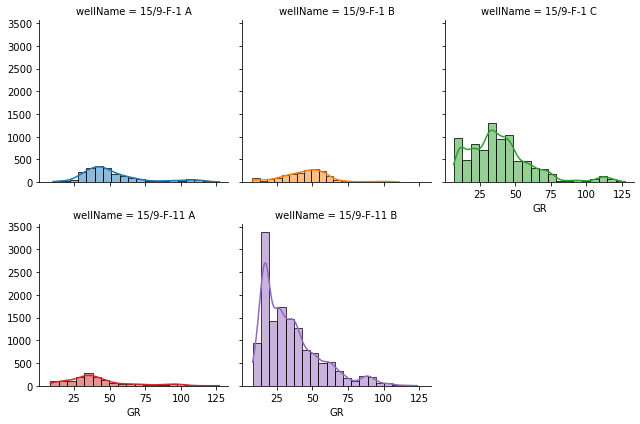

In [25]:
g = sns.FacetGrid(df, col='wellName', hue='wellName', col_wrap=3)
g.map(sns.histplot, 'GR', kde=True, bins=20)

#### KDEPlot

If we want to view the distribution of the data as a line, we can use the Kernel Density Estimation plot (`kdeplot`). This is useful if we looking to see if the data requires normalisation.

<AxesSubplot:xlabel='GR', ylabel='Density'>

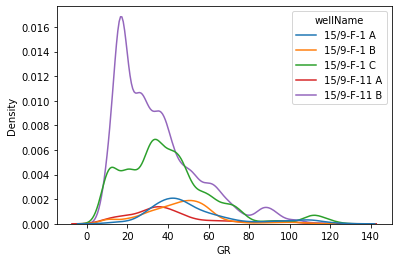

In [26]:
sns.kdeplot(data=df, x='GR', hue='wellName')

### Seaborn Pairplot

Rather than looking at a limited number of variables each time, we can quickly create a grid containing a mixture of crossplots and histograms using a simple line of code from the seaborn library. This is known as a pair plot.

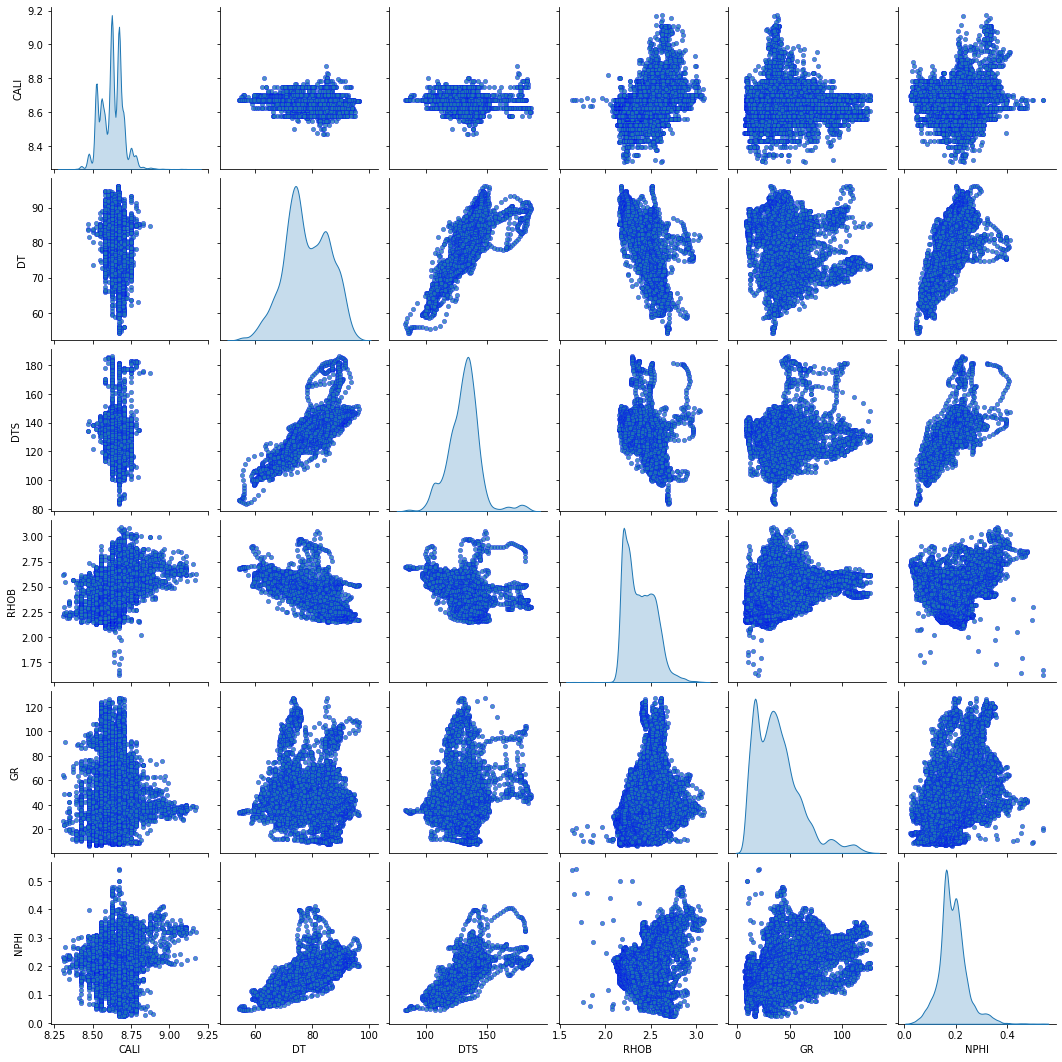

In [27]:
sns.pairplot(df, vars=['CALI', 'DT','DTS', 'RHOB', 'GR', 'NPHI'], 
             diag_kind='kde', plot_kws = {'alpha': 0.8, 's': 20, 'edgecolor': 'b'})

# Summary

In this workbook we have used a number of tools to explore the dataset and gain some initial insights into it. This has been achieved through log plots, crossplots (scatterplots), histograms and a pairplot.

The next step is to identify if there is any missing data present within the dataset.